## Download dataset of indian elephant, african elephant and tusker. Find which pretrained model get highest accuracy

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

indian = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04037443")#indian
print(indian.content)
indian_soup = BeautifulSoup(indian.content, 'html.parser')
african = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")#african
print(african.content)
african_soup = BeautifulSoup(african.content, 'html.parser')

tusker = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")#tusker
print(tusker.content)
tusker_soup = BeautifulSoup(tusker.content, 'html.parser')



indian_str_soup=str(indian_soup)
type(indian_str_soup)
indian_split_urls=indian_str_soup.split('\r\n')

african_str_soup=str(african_soup)
type(african_str_soup)
african_split_urls=african_str_soup.split('\r\n')


tusker_str_soup=str(tusker_soup)
type(tusker_str_soup)
tusker_split_urls=tusker_str_soup.split('\r\n')

b"http://www.upmoon.com/up7/Mitsubishi%20Eclipse%20Street%20Racing%20Car.jpg\r\nhttp://www.hunternet.com.au/members/uploads/images/SkidPadFront.jpg\r\nhttp://farm1.static.flickr.com/202/463662585_60ea3e8381.jpg\r\nhttp://www.cardsunlimited.com/largeimage/RacingCar.jpg\r\nhttp://www.iceposter.com/thumbs/A11870_b.jpg\r\nhttp://images.stockcarracing.com/thehistoryof/bio/0305134_5z+UPS_Ford_Taurus_Race_Car_And_Alltel_Race_Car+Side_View_Crash.jpg\r\nhttp://farm1.static.flickr.com/52/125814197_2134befc92.jpg\r\nhttp://www.modulinecabinets.com/images/racingcar3.jpg\r\nhttp://www.motorsportscenter.com/Gallery/Lotus/2002/EspritHighlights/images/GT2%20Race%20Car.jpg\r\nhttp://static.flickr.com/27/45610287_7ab9519ec3.jpg\r\nhttp://static.flickr.com/58/189717326_074d658caf.jpg\r\nhttp://farm1.static.flickr.com/191/452522204_2d00bf011f.jpg\r\nhttp://farm4.static.flickr.com/3042/2591353506_623f4024c2.jpg\r\nhttp://www.rotaryaviation.com/images/Race_cars_Seals/Race_cars_Seals/quiles.jpg\r\nhttp://far

In [2]:
!mkdir /content/train 
!mkdir /content/train/indian
!mkdir /content/train/african 
!mkdir /content/train/tusker 

!mkdir /content/validation
!mkdir /content/validation/indian
!mkdir /content/validation/african
!mkdir /content/validation/tusker

mkdir: cannot create directory ‘/content/train’: File exists
mkdir: cannot create directory ‘/content/train/indian’: File exists
mkdir: cannot create directory ‘/content/train/african’: File exists
mkdir: cannot create directory ‘/content/train/tusker’: File exists
mkdir: cannot create directory ‘/content/validation’: File exists
mkdir: cannot create directory ‘/content/validation/indian’: File exists
mkdir: cannot create directory ‘/content/validation/african’: File exists
mkdir: cannot create directory ‘/content/validation/tusker’: File exists


In [3]:
img_rows, img_cols = 32, 32 
input_shape = (img_rows, img_cols, 3)
def url_to_image(url):
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	return image

n_of_training_images=150
for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not indian_split_urls[progress] == None:
      try:
        I = url_to_image(indian_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/train/indian/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not african_split_urls[progress] == None:
      try:
        I = url_to_image(african_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/train/african/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):
    if(progress%20==0):
        print(progress)
    if not tusker_split_urls[progress] == None:
      try:
        I = url_to_image(tusker_split_urls[progress])
        if (len(I.shape))==3: 
          save_path = '/content/train/tusker/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None


for progress in range(50):
    if(progress%20==0):
        print(progress)
    if not indian_split_urls[progress] == None:
      try:
        I = url_to_image(indian_split_urls[n_of_training_images+progress])
        if (len(I.shape))==3: 
          save_path = '/content/validation/indian/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):
    if(progress%20==0):
        print(progress)
    if not african_split_urls[progress] == None:
      try:
        I = url_to_image(african_split_urls[n_of_training_images+progress])
        if (len(I.shape))==3: 
          save_path = '/content/validation/african/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(50):
    if(progress%20==0):
        print(progress)
    if not tusker_split_urls[progress] == None:
      try:
        I = url_to_image(tusker_split_urls[n_of_training_images+progress])
        if (len(I.shape))==3: 
          save_path = '/content/validation/tusker/img'+str(progress)+'.jpg'
          cv2.imwrite(save_path,I)

      except:
        None


print("\nTRAIN:\n")          
print("\nlist the files inside indian directory:\n")        
!ls /content/train/indian 
print("\nlist the files inside african directory:\n")
!ls /content/train/african 
print("\nlist the files inside tusker directory:\n")
!ls /content/train/tusker 

print("\nVALIDATION:\n")
print("\nlist the files inside indian directory:\n")        
!ls /content/validation/indian 
print("\nlist the files inside african directory:\n")
!ls /content/validation/african 
print("\nlist the files inside tusker directory:\n")
!ls /content/validation/tusker

0
20
40
60
80
100
120
140
0
20
40
60
80
100
120
140
0
20
40
60
80
100
120
140
0
20
40
0
20
40
0
20
40

TRAIN:


list the files inside indian directory:

img0.jpg    img117.jpg	img141.jpg  img2.jpg   img50.jpg  img67.jpg  img86.jpg
img100.jpg  img119.jpg	img142.jpg  img30.jpg  img51.jpg  img68.jpg  img87.jpg
img102.jpg  img11.jpg	img143.jpg  img31.jpg  img52.jpg  img69.jpg  img88.jpg
img103.jpg  img121.jpg	img145.jpg  img33.jpg  img53.jpg  img6.jpg   img89.jpg
img104.jpg  img122.jpg	img147.jpg  img34.jpg  img54.jpg  img70.jpg  img8.jpg
img105.jpg  img123.jpg	img148.jpg  img35.jpg  img55.jpg  img71.jpg  img90.jpg
img106.jpg  img125.jpg	img149.jpg  img36.jpg  img56.jpg  img74.jpg  img91.jpg
img107.jpg  img127.jpg	img15.jpg   img37.jpg  img57.jpg  img75.jpg  img92.jpg
img108.jpg  img128.jpg	img17.jpg   img39.jpg  img58.jpg  img76.jpg  img93.jpg
img109.jpg  img129.jpg	img18.jpg   img3.jpg   img59.jpg  img77.jpg  img94.jpg
img10.jpg   img12.jpg	img1.jpg    img40.jpg  img5.jpg   img78.jpg  im

In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen  = ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,
                                 validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)
    
train_generator = train_datagen.flow_from_directory(
        '/content/train/',
        target_size=(img_rows, img_cols),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/train/',
        target_size=(img_rows, img_cols),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
        )
test_generator = test_datagen.flow_from_directory(
        '/content/validation/',
        target_size=(img_rows, img_cols),
        batch_size=32,
        class_mode='categorical'
        )

Found 263 images belonging to 3 classes.
Found 65 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator

model_resnet50=Sequential()
model_resnet50.add(ResNet50(include_top = False, pooling = 'avg', weights = "imagenet"))
model_resnet50.add(Flatten())
model_resnet50.add(Dense(128, activation = 'relu'))
model_resnet50.add(Dropout(0.2))
model_resnet50.add(Dense(64, activation = 'relu'))
model_resnet50.add(Dropout(0.2))
model_resnet50.add(Dense(3, activation = 'softmax'))
model_resnet50.layers[0].trainable = False


In [18]:
model_resnet50.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_resnet50.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                

In [20]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [21]:
model_resnet50_history=model_resnet50.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=[checkpointer])

Epoch 1/10
9/9 [==============================] - 2s 275ms/step - loss: 1.4510 - accuracy: 0.3270 - val_loss: 1.1780 - val_accuracy: 0.3385
Epoch 2/10
9/9 [==============================] - 3s 333ms/step - loss: 1.2539 - accuracy: 0.3346 - val_loss: 1.1120 - val_accuracy: 0.3692
Epoch 3/10
9/9 [==============================] - 3s 325ms/step - loss: 1.1681 - accuracy: 0.3802 - val_loss: 1.0924 - val_accuracy: 0.3538
Epoch 4/10
9/9 [==============================] - 1s 127ms/step - loss: 1.1581 - accuracy: 0.3346 - val_loss: 1.0974 - val_accuracy: 0.3692
Epoch 5/10
9/9 [==============================] - 1s 137ms/step - loss: 1.1438 - accuracy: 0.3726 - val_loss: 1.0952 - val_accuracy: 0.3077
Epoch 6/10
9/9 [==============================] - 2s 171ms/step - loss: 1.0985 - accuracy: 0.3764 - val_loss: 1.0876 - val_accuracy: 0.4462
Epoch 7/10
9/9 [==============================] - 1s 127ms/step - loss: 1.1258 - accuracy: 0.3612 - val_loss: 1.0901 - val_accuracy: 0.3692
Epoch 8/10
9/9 [====

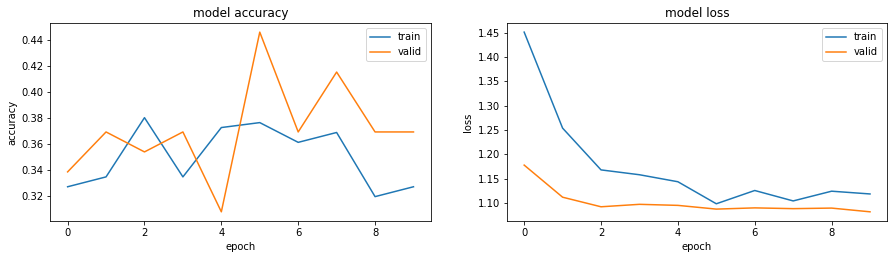

In [23]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(model_resnet50_history.history['accuracy'])  
plt.plot(model_resnet50_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(model_resnet50_history.history['loss'])  
plt.plot(model_resnet50_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()


In [24]:
model_resnet50.evaluate(test_generator)

4/4 [==============================] - 0s 109ms/step - loss: 1.0803 - accuracy: 0.3667


[1.0803476572036743, 0.36666667461395264]

In [35]:
from keras.applications import Xception

xception_model = Sequential()
xception_model.add(Xception(include_top=False, weights="imagenet", input_shape = (224, 224, 3), pooling="avg"))
xception_model.add(Dense(3, activation="softmax"))
xception_model.layers[0].trainable = False
xception_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 6147      
Total params: 20,867,627
Trainable params: 6,147
Non-trainable params: 20,861,480
_________________________________________________________________


In [36]:
xception_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

In [37]:
xception_model_history=xception_model.fit(train_generator,epochs=20,validation_data=validation_generator,callbacks=[checkpointer])

Epoch 1/20
9/9 [==============================] - 2s 205ms/step - loss: 1.0980 - accuracy: 0.3764 - val_loss: 1.0942 - val_accuracy: 0.3846
Epoch 2/20
9/9 [==============================] - 1s 130ms/step - loss: 1.0884 - accuracy: 0.4753 - val_loss: 1.1005 - val_accuracy: 0.4154
Epoch 3/20
9/9 [==============================] - 1s 131ms/step - loss: 1.0823 - accuracy: 0.4639 - val_loss: 1.0996 - val_accuracy: 0.4000
Epoch 4/20
9/9 [==============================] - 1s 128ms/step - loss: 1.0799 - accuracy: 0.4525 - val_loss: 1.0933 - val_accuracy: 0.4462
Epoch 5/20
9/9 [==============================] - 1s 122ms/step - loss: 1.0750 - accuracy: 0.5247 - val_loss: 1.0939 - val_accuracy: 0.4462
Epoch 6/20
9/9 [==============================] - 1s 164ms/step - loss: 1.0666 - accuracy: 0.5361 - val_loss: 1.0800 - val_accuracy: 0.4615
Epoch 7/20
9/9 [==============================] - 1s 131ms/step - loss: 1.0595 - accuracy: 0.5247 - val_loss: 1.0867 - val_accuracy: 0.4308
Epoch 8/20
9/9 [====

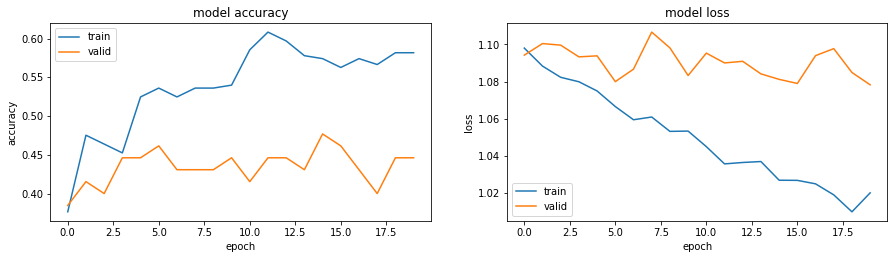

In [38]:
import matplotlib.pyplot as plt
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(xception_model_history.history['accuracy'])  
plt.plot(xception_model_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(xception_model_history.history['loss'])  
plt.plot(xception_model_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()


In [39]:
xception_model.evaluate(test_generator)

4/4 [==============================] - 0s 106ms/step - loss: 1.0673 - accuracy: 0.4917


[1.0673121213912964, 0.49166667461395264]